In [218]:
src = "API_SP.POP.GROW_DS2_en_csv_v2_10182032.csv"

import pandas as pd
import altair as alt
from vega_datasets import data
flatten = lambda l: [item for sublist in l for item in sublist]

title = "Population growth (annual %)"
df = pd.read_csv(src, header=2)
df = df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

df.rename(columns={
    'Country Name': 'country'
}, inplace=True)

df.shape
df.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,0.616991,0.587373,0.568530,...,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929,0.420781,NaN
1,Afghanistan,1.816077,1.876528,1.934999,1.992521,2.049423,2.105369,2.129588,2.146727,2.209331,...,2.569114,2.812617,3.095119,3.272703,3.315224,3.183201,2.943234,2.689163,2.490790,NaN
2,Angola,1.903517,1.927754,1.945774,1.930693,1.870296,1.788799,1.701798,1.653899,1.681743,...,3.566821,3.570099,3.570352,3.559496,3.531824,3.485413,3.428021,3.367572,3.313507,NaN
3,Albania,3.015423,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,2.842511,...,-0.673894,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,NaN
4,Andorra,7.050663,6.941532,6.692697,6.559522,6.241511,5.998800,5.750878,5.500706,5.309820,...,0.714106,-0.015393,-0.829969,-1.588653,-2.013314,-1.956178,-1.537836,-0.944017,-0.409736,NaN


In [219]:
src2 = "base_pops/API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv"

df2 = pd.read_csv(src2, header=2)
df2 = df2.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

df2.rename(columns={
    'Country Name': 'country'
}, inplace=True)


In [223]:
just_china = df[df['country']=='China'].T
just_china_base = df2[df2['country']=='China'].T
# print(just_china_base.T.iloc(0))

just2_china = pd.DataFrame(just_china.iloc[1:])
just2_china_base = pd.DataFrame(just_china_base.iloc[1:])
# print(just2_china_base.values)


columns = ['year', 'delta_pop', 'pop']
# china.columns = columns

# just2_china.rename(columns={
#     38: columns[1]
# }, index={'Name' : columns[0]}, inplace=True)

# print(china.index.values)

# print(flatten(china.values))

# print(just2_china)

china = pd.DataFrame({columns[0]: just2_china.index.values, 
                      columns[1]: flatten(just2_china.values), 
                      columns[2]: flatten(just2_china_base.values)})
#china.head()

# just2_china['year'] = just2_china.index

# china['pop'] = 

# just2_china['year'] = just2_china[index]

# print(china[columns[2]].min())

print(pd.DataFrame(just_china.iloc[1:]).index.values)
print(just2_china.index.values)

['1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' 'Unnamed: 62']
['1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' 'Unnamed: 62']


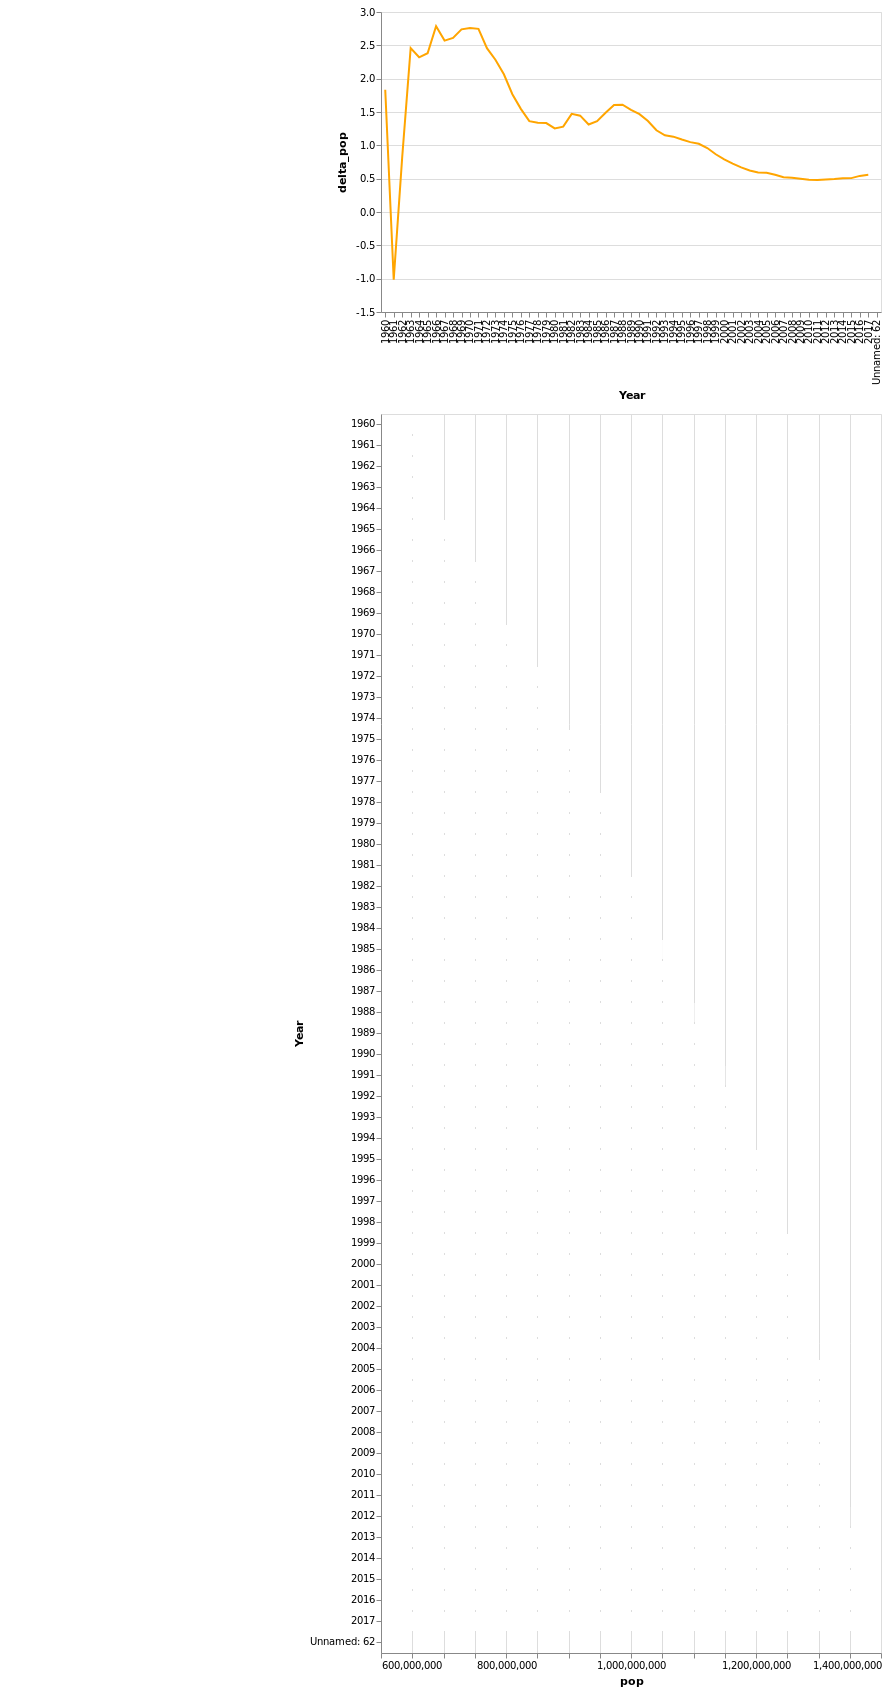

In [215]:
interval = alt.selection_interval(encodings=['x'])

chart_delta = alt.Chart(china, width=500).mark_line(color='orange').encode(
    x=alt.X('year', axis=alt.Axis(title='Year')),
    #x='year',
    y='delta_pop'
    #tooltip='year'
    # y=alt.Y('delta_pop', axis=alt.Axis(format='%', title='Change in Population'))
).properties(
    selection=interval
)


chart_pop = alt.Chart(china, width=500).mark_bar(color='white').encode(
    x=alt.X('pop',  scale=alt.Scale(domain=(china[columns[2]].min(), china[columns[2]].max()))),
    y=alt.Y('year', axis=alt.Axis(title='Year')),
    #x='year',
    # y='pop'
    #tooltip='year'
    # y=alt.Y('delta_pop', axis=alt.Axis(format='%', title='Change in Population'))
).transform_filter(
    interval
)


chart_delta & chart_pop

In [217]:
jk = pd.read_csv(src2, header=2).drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

jk.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


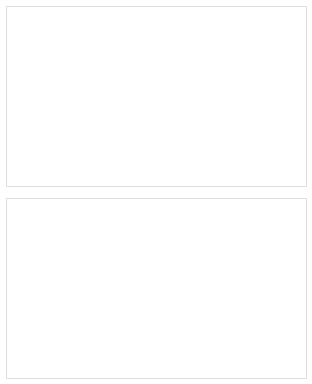

In [16]:
interval = alt.selection_interval(encodings=['x'])

base = alt.Chart(df).mark_geoshape(
    fill='1960',
    stroke='white',
    tooltip='Country Name'
).properties(
    width=300,
    height=180,
    # selection=interval
)

# chart = base.project('gnomonic')

chart & base

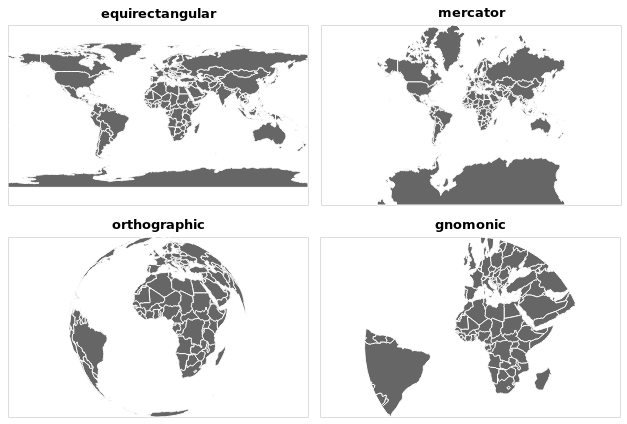

In [14]:

countries = alt.topo_feature(data.world_110m.url, 'countries')

base = alt.Chart(countries).mark_geoshape(
    fill='#666666',
    stroke='white'
).properties(
    width=300,
    height=180
)

projections = ['equirectangular', 'mercator', 'orthographic', 'gnomonic']
charts = [base.project(proj).properties(title=proj)
          for proj in projections]

alt.vconcat(
    alt.hconcat(*charts[:2]),
    alt.hconcat(*charts[2:])
)


In [1]:
chart2 = alt.Chart(df)

NameError: name 'alt' is not defined

In [210]:

def func(n):
    n -= 1
    def gunc(n):
        return lambda k: k**n
    return gunc(n)

def delta_and_pop(country):
    columns = ['year', 'pop', 'delta_pop']
    src = "API_SP.POP.GROW_DS2_en_csv_v2_10182032.csv"

    : 
    

In [214]:
stuff = func(7)
print(stuff(3))

3**6

729


729